In [1]:
%pylab inline
import scanpy as sc
import pandas as pd
import pickle

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
seg_label = np.load('./data/Segerstolpe-test-label.npy')
seg_name = np.load('./data/Segerstolpe-str_label.npy')

In [3]:
emb_path="./data/seg-emb.pkl"
emb=None
label=None
f=open(emb_path, 'rb')
while 1:
    try:
        sub_pkl = pickle.load(f)
        tmp_emb = sub_pkl["emb"]
        tmp_label = sub_pkl["label"]
        if emb is None:
            emb = tmp_emb
            label = tmp_label
        else:
            emb = np.vstack([emb,tmp_emb])
            label = np.concatenate([label,tmp_label])
    except:
        break

emb = emb[-seg_label.shape[0]:,:]
label = label[-seg_label.shape[0]:]

In [4]:
emb_path="./data/seg-cellemb.pkl"
cellemb=None
label=None
f=open(emb_path, 'rb')
while 1:
    try:
        sub_pkl = pickle.load(f)
        tmp_emb = sub_pkl["emb"]
        tmp_label = sub_pkl["label"]
        if cellemb is None:
            cellemb = tmp_emb
            label = tmp_label
        else:
            cellemb = np.vstack([cellemb,tmp_emb])
            label = np.concatenate([label,tmp_label])
    except:
        break

cellemb = cellemb[-seg_label.shape[0]:,:]
label = label[-seg_label.shape[0]:]

In [5]:
for i in range(seg_label.shape[0]):
    assert seg_label[i]==label[i]

In [6]:
y_pred = np.argmax(emb,1)

In [7]:
segadata = sc.AnnData(cellemb)
sc.pp.neighbors(segadata,use_rep='X')

sc.tl.umap(segadata)

segadata.obs['true_label']=seg_name[seg_label]
segadata.obs['pred_label']=seg_name[y_pred]

/Users/aroma/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


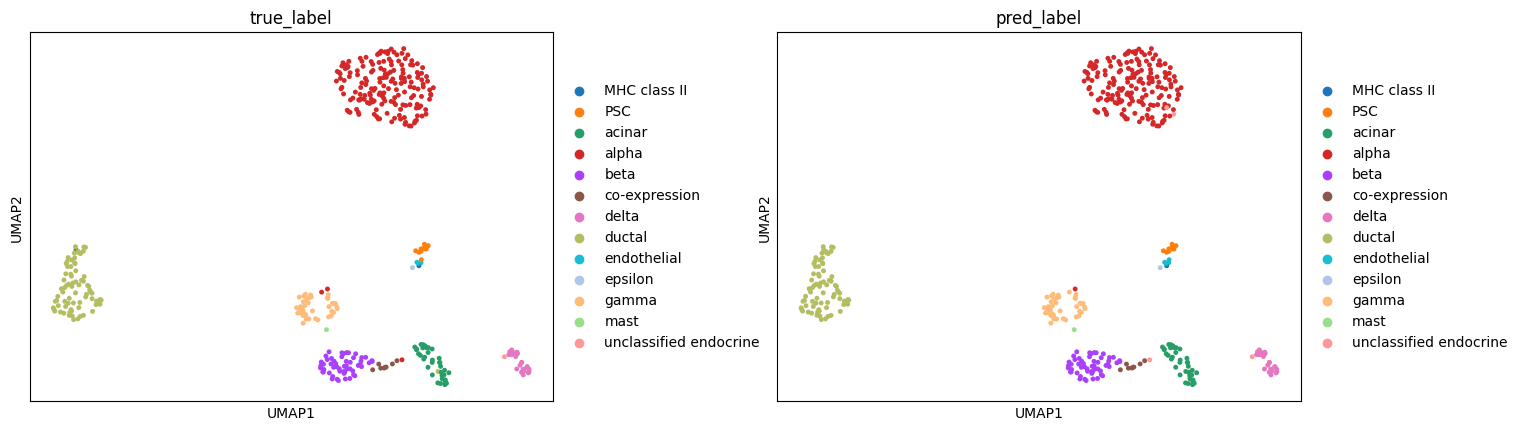

In [8]:
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
sc.pl.umap(segadata,color=['true_label','pred_label'],wspace=0.3,size=50,save='scf_seg')

In [9]:
ctpadata = sc.read_h5ad('./data/celltypist_0806_seg.h5ad')

ctpadata.obs['predict_strlabels']=seg_name[ctpadata.obs['predicted_labels'].values]
ctpadata.obs['predict_strlabels'] = ctpadata.obs['predict_strlabels'].astype('category')

sc.tl.umap(ctpadata)

In [10]:
pal = {}
for i in range(len(seg_name)):
    pal[segadata.obs.true_label.cat.categories[i]]=segadata.uns['true_label_colors'][i]

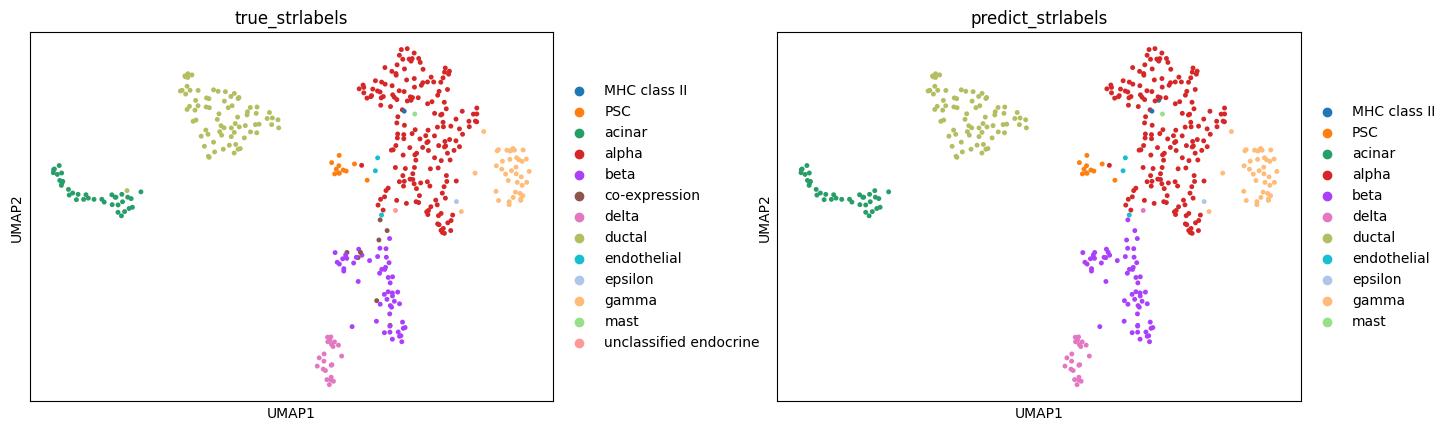

In [ ]:

sc.pl.umap(ctpadata,color=['true_strlabels','predict_strlabels'],wspace=0.3,size=50,palette=pal,save='celltypist_seg')

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ctpadata.obs['true_strlabels'], ctpadata.obs['predict_strlabels'], target_names=seg_name))

                        precision    recall  f1-score   support

          MHC class II       0.50      1.00      0.67         1
                   PSC       1.00      1.00      1.00        11
                acinar       0.97      1.00      0.99        36
                 alpha       1.00      0.99      1.00       175
                  beta       0.87      1.00      0.93        53
         co-expression       0.00      0.00      0.00         8
                 delta       0.96      1.00      0.98        22
                ductal       1.00      0.99      0.99        76
           endothelial       1.00      1.00      1.00         3
               epsilon       1.00      1.00      1.00         1
                 gamma       1.00      1.00      1.00        39
                  mast       1.00      1.00      1.00         1
unclassified endocrine       0.00      0.00      0.00         1

              accuracy                           0.97       427
             macro avg       0.79     

/Users/aroma/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aroma/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aroma/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [12]:
ori_zheng_label = np.load('./data/zheng-test-label.npy')
zheng_name = np.load('./data/zheng-str_label.npy')

In [13]:
zhengemb_path="./data/zheng-emb-2mlp.pkl"
zheng_emb=None
zheng_label=None
f=open(zhengemb_path, 'rb')
while 1:
    try:
        sub_pkl = pickle.load(f)
        tmp_emb = sub_pkl["emb"]
        tmp_label = sub_pkl["label"]
        if zheng_emb is None:
            zheng_emb = tmp_emb
            zheng_label = tmp_label
        else:
            zheng_emb = np.vstack([zheng_emb,tmp_emb])
            zheng_label = np.concatenate([zheng_label,tmp_label])
    except:
        break

In [14]:
for i in range(zheng_label.shape[0]):
    assert zheng_label[i]==ori_zheng_label[i]

In [15]:
y_pred = np.argmax(zheng_emb,1)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(zheng_label, y_pred, target_names=zheng_name))

                              precision    recall  f1-score   support

              CD14+ Monocyte       0.85      0.87      0.86       195
                     CD19+ B       0.86      0.88      0.87       558
                       CD34+       0.95      0.95      0.95        19
              CD4+ T Helper2       0.33      0.11      0.17         9
             CD4+/CD25 T Reg       0.69      0.67      0.68       612
  CD4+/CD45RA+/CD25- Naive T       0.56      0.61      0.58       185
         CD4+/CD45RO+ Memory       0.55      0.66      0.60       303
                    CD56+ NK       0.91      0.94      0.93       853
            CD8+ Cytotoxic T       0.90      0.81      0.85      2031
CD8+/CD45RA+ Naive Cytotoxic       0.84      0.90      0.87      1636
                   Dendritic       0.84      0.78      0.81       194

                    accuracy                           0.83      6595
                   macro avg       0.75      0.74      0.74      6595
                we

In [17]:
zhengemb_path="./data/zheng-cellemb-2mlp.pkl"
zheng_emb=None
zheng_label=None
f=open(zhengemb_path, 'rb')
while 1:
    try:
        sub_pkl = pickle.load(f)
        tmp_emb = sub_pkl["emb"]
        tmp_label = sub_pkl["label"]
        if zheng_emb is None:
            zheng_emb = tmp_emb
            zheng_label = tmp_label
        else:
            zheng_emb = np.vstack([zheng_emb,tmp_emb])
            zheng_label = np.concatenate([zheng_label,tmp_label])
    except:
        break

In [18]:
zheng_emb.shape

(6595, 768)

In [19]:
zhengadata = sc.AnnData(zheng_emb)
sc.pp.neighbors(zhengadata,use_rep='X')
sc.tl.umap(zhengadata)
zhengadata.obs['true_label']=zheng_name[zheng_label]
zhengadata.obs['pred_label']=zheng_name[y_pred]

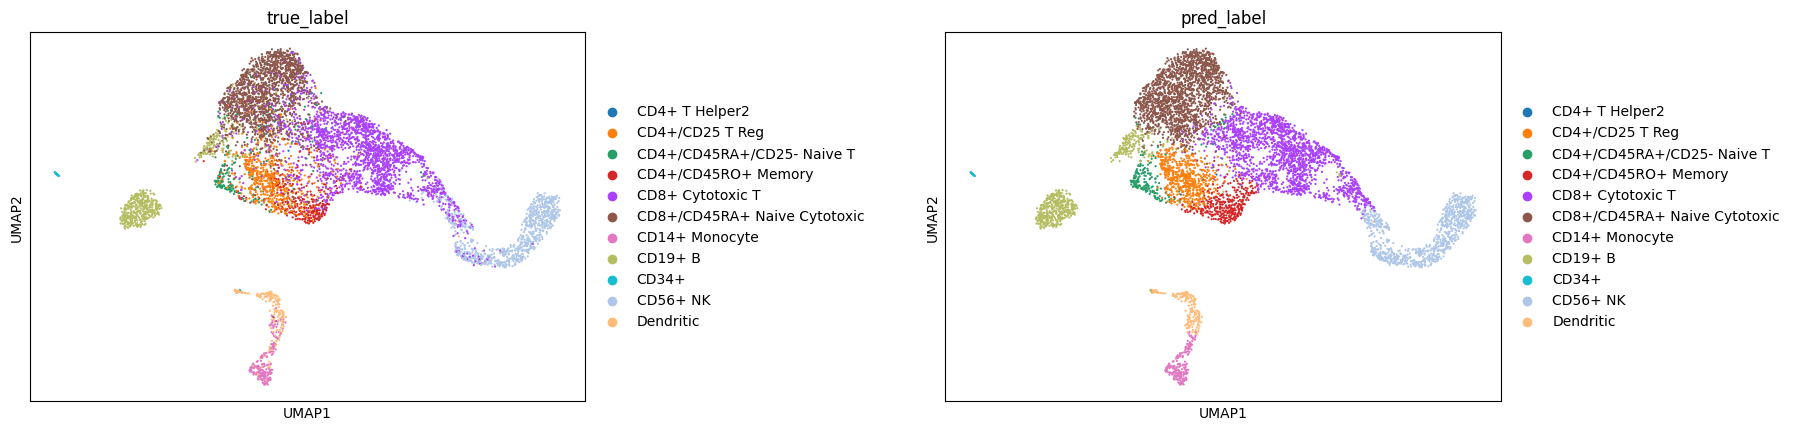

In [20]:
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
sc.pl.umap(zhengadata,color=['true_label','pred_label'],wspace=0.5,size=10,save='scf_zheng')

In [21]:
ctpzhengadata = sc.read_h5ad('./data/celltypist_0806_zheng68k.h5ad')

ctpzhengadata.obs['predict_strlabels']=zheng_name[ctpzhengadata.obs['predicted_labels'].values]
ctpzhengadata.obs['predict_strlabels'] = ctpzhengadata.obs['predict_strlabels'].astype('category')

sc.tl.umap(ctpzhengadata)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(ctpzhengadata.obs['true_strlabels'], ctpzhengadata.obs['predict_strlabels'], target_names=zheng_name))

                              precision    recall  f1-score   support

              CD14+ Monocyte       0.86      0.85      0.85       195
                     CD19+ B       0.90      0.84      0.87       558
                       CD34+       1.00      0.84      0.91        19
              CD4+ T Helper2       0.00      0.00      0.00         9
             CD4+/CD25 T Reg       0.72      0.69      0.71       612
  CD4+/CD45RA+/CD25- Naive T       0.66      0.54      0.59       185
         CD4+/CD45RO+ Memory       0.70      0.47      0.56       303
                    CD56+ NK       0.93      0.92      0.92       853
            CD8+ Cytotoxic T       0.86      0.83      0.84      2031
CD8+/CD45RA+ Naive Cytotoxic       0.80      0.94      0.87      1636
                   Dendritic       0.84      0.83      0.83       194

                    accuracy                           0.83      6595
                   macro avg       0.75      0.70      0.72      6595
                we

In [23]:
pal = {}
for i in range(len(zheng_name)):
    pal[zhengadata.obs.true_label.cat.categories[i]]=zhengadata.uns['true_label_colors'][i]

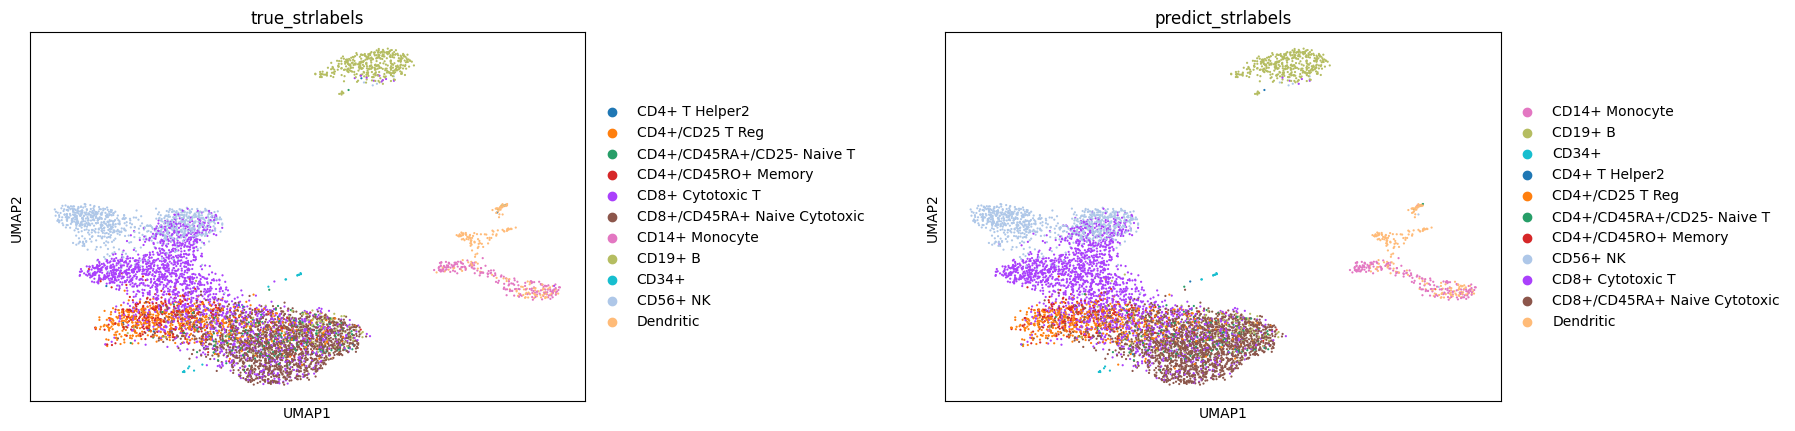

In [24]:
sc.pl.umap(ctpzhengadata,color=['true_strlabels','predict_strlabels'],wspace=0.5,size=10,palette=pal,save='celltypist_zheng')